In [1]:
# Read CSV
import pandas as pd
df = pd.read_csv("medical_clean.csv")

In [2]:
# Get profile of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# CHeck for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [4]:
# CHeck for mising values
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [5]:
# Remove non-continuous variables
df = df.drop(columns=[
    'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County',
    'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'ReAdmis',
    'Soft_drink', 'Initial_admin','HighBlood', 'Stroke', 'Complication_risk', 
    'Overweight', 'Arthritis','Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 
    'Allergic_rhinitis','Reflux_esophagitis', 'Asthma', 'Services', 'Item1', 'Item2', 
    'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'
])

In [6]:
# Recheck data profile
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Population          10000 non-null  int64  
 1   Children            10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Income              10000 non-null  float64
 4   VitD_levels         10000 non-null  float64
 5   Doc_visits          10000 non-null  int64  
 6   Full_meals_eaten    10000 non-null  int64  
 7   vitD_supp           10000 non-null  int64  
 8   Initial_days        10000 non-null  float64
 9   TotalCharge         10000 non-null  float64
 10  Additional_charges  10000 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 859.5 KB


In [7]:
# Use Standard Scaler to standardize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
scaled_data_array = sc.transform(df)
scaled_data = pd.DataFrame(scaled_data_array, columns = df.columns)
scaled_data.head()

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310,-0.727185,0.765005
1,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595,-0.513228,0.715114
2,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,-1.319983,0.698635
3,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,-1.460517,0.009004
4,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,-1.467285,-1.408991


In [8]:
# Extract new dataset
scaled_data.to_csv("D212_scaled_task2.csv")

In [9]:
# Start PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_data)
components = pca.components_
num_components = pca.n_components_
print("Number of PCA components:", num_components)
print(components)

Number of PCA components: 11
[[ 2.44511743e-02  3.45195738e-02  8.48720083e-02 -2.01838881e-02
  -2.03929958e-03 -6.88879623e-03 -2.07025898e-02  2.53662935e-02
   7.00221817e-01  7.01357789e-01  8.52225996e-02]
 [-2.83535470e-02  1.74102130e-02  7.00761699e-01 -1.90464369e-02
   2.04374565e-02  1.54471454e-02  3.21460471e-02  1.45223075e-02
  -9.02354616e-02 -7.96433661e-02  7.00768979e-01]
 [-4.21855330e-01  9.67308062e-02 -2.35236102e-02 -3.25252285e-01
   3.59912973e-01 -2.13143722e-01  6.03613282e-01 -4.07015454e-01
   1.84109047e-02  1.96096184e-02 -2.52419557e-02]
 [ 3.70208759e-01  3.48999558e-01 -1.71588780e-02  1.96995274e-01
   5.72299909e-01  5.93921973e-01  1.29857514e-01 -6.95211909e-02
  -5.48904159e-03 -2.23042021e-03 -6.43803931e-03]
 [-2.35895710e-01  5.18806655e-01  6.68861022e-03  6.58377615e-01
  -3.28572558e-01 -1.06641745e-01  3.04058833e-02 -3.48283329e-01
   6.56530818e-03  4.80109808e-03  7.91895381e-03]
 [ 3.49304908e-01  6.26415103e-01 -3.29358294e-03 -3.227

In [10]:
# Based on code from Middleton (n.d., slide 11, "Welcome To Getting Started With Principal Component Analysis (PCA)")
medical_features =  scaled_data[['Population', 'Children','Age', 'Income', 'VitD_levels', 
'Doc_visits','Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']]

# Normalize data using standardization (mean normalization)
# Based on code from Middleton (n.d., slide 12, "Welcome To Getting Started With Principal Component Analysis (PCA)")
normalized_medical_features = (medical_features-medical_features.mean())/medical_features.std()
# Based on code from Middleton (n.d., slide 13, "Welcome To Getting Started With Principal Component Analysis (PCA)")
medical_features_pca = pd.DataFrame(pca.transform(normalized_medical_features),columns=
['PC1','PC2','PC3','P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11'])

# Get PCA loadings
# Based on code from Middleton (n.d., slide 15, "Welcome To Getting Started With Principal Component Analysis (PCA)")
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4', 'PC5',
'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'], index=normalized_medical_features.columns)
print(loadings)

                         PC1       PC2       PC3       PC4       PC5  \
Population          0.024451 -0.028354 -0.421855  0.370209 -0.235896   
Children            0.034520  0.017410  0.096731  0.349000  0.518807   
Age                 0.084872  0.700762 -0.023524 -0.017159  0.006689   
Income             -0.020184 -0.019046 -0.325252  0.196995  0.658378   
VitD_levels        -0.002039  0.020437  0.359913  0.572300 -0.328573   
Doc_visits         -0.006889  0.015447 -0.213144  0.593922 -0.106642   
Full_meals_eaten   -0.020703  0.032146  0.603613  0.129858  0.030406   
vitD_supp           0.025366  0.014522 -0.407015 -0.069521 -0.348283   
Initial_days        0.700222 -0.090235  0.018411 -0.005489  0.006565   
TotalCharge         0.701358 -0.079643  0.019610 -0.002230  0.004801   
Additional_charges  0.085223  0.700769 -0.025242 -0.006438  0.007919   

                         PC6       PC7       PC8       PC9      PC10      PC11  
Population          0.349305 -0.479600  0.222540  0.47

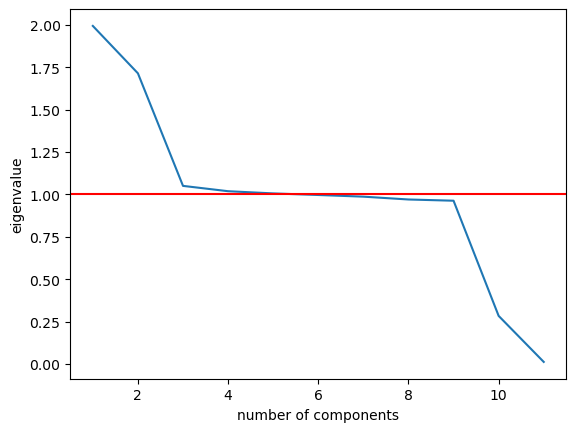

Eigenvector 1: [ 0.02445117  0.03451957  0.08487201 -0.02018389 -0.0020393  -0.0068888
 -0.02070259  0.02536629  0.70022182  0.70135779  0.0852226 ]
Eigenvector 2: [-0.02835355  0.01741021  0.7007617  -0.01904644  0.02043746  0.01544715
  0.03214605  0.01452231 -0.09023546 -0.07964337  0.70076898]
Eigenvector 3: [-0.42185533  0.09673081 -0.02352361 -0.32525229  0.35991297 -0.21314372
  0.60361328 -0.40701545  0.0184109   0.01960962 -0.02524196]
Eigenvector 4: [ 0.37020876  0.34899956 -0.01715888  0.19699527  0.57229991  0.59392197
  0.12985751 -0.06952119 -0.00548904 -0.00223042 -0.00643804]
Eigenvector 5: [-0.23589571  0.51880666  0.00668861  0.65837762 -0.32857256 -0.10664174
  0.03040588 -0.34828333  0.00656531  0.0048011   0.00791895]
Eigenvector 6: [ 0.34930491  0.6264151  -0.00329358 -0.32278807  0.13358288 -0.54554543
 -0.2287827   0.1062496  -0.03437272 -0.03330652  0.00130183]
Eigenvector 7: [-0.47960034  0.27971458 -0.02452928  0.08185809  0.09290248  0.07284327
  0.17200175 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# Select PCs
# Calculate covariance 
# Based on code from Middleton (n.d., slide 17, "Welcome To Getting Started With Principal Component Analysis (PCA)")
cov_matrix = np.dot(normalized_medical_features.T, normalized_medical_features) / medical_features.shape[0]

# Calculate Vectors
# Based on code from Middleton (n.d., slide 17, "Welcome To Getting Started With Principal Component Analysis (PCA)")
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

# Create scree plot
# Based on code from Middleton (n.d., slide 17, "Welcome To Getting Started With Principal Component Analysis (PCA)")
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color="red")
plt.show()

# Display eigenvectors
for i, eigenvector in enumerate(pca.components_):
    print(f"Eigenvector {i+1}: {eigenvector}")


In [12]:
# Sort eigenvalues in descending order
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Calculate the number of eigenvalues greater than 1
eigen_components = np.sum(eigenvalues_sorted > 1)

print(f"Number of Principal Components to Retain: {eigen_components}")

Number of Principal Components to Retain: 5


In [13]:
# Get variance per retained principal component

retained_pc = PCA(n_components=5, random_state=42)
retained_pc.fit(scaled_data)
variance_pca = retained_pc.transform(scaled_data)

captured_variance = retained_pc.explained_variance_ratio_ * 100

# Print the captured variance for each component
for i, var in enumerate(captured_variance):
    print(f"Principal Component {i+1}: {var:.2f}%")


Principal Component 1: 18.14%
Principal Component 2: 15.59%
Principal Component 3: 9.55%
Principal Component 4: 9.27%
Principal Component 5: 9.15%


In [14]:
# Get total variance
cumulative_variance = np.cumsum(captured_variance[:5])
print(f"Total variance explained by top 5 components: {cumulative_variance[-1]:.2f}%\n")

print("Cumulative variance up to 1st principal component =", cumulative_variance[0])
print("Cumulative variance up to 2nd principal component =", cumulative_variance[1])
print("Cumulative variance up to 3rd principal component =", cumulative_variance[2])
print("Cumulative variance up to 4th principal component =", cumulative_variance[3])
print("Cumulative variance up to 5th principal component =", cumulative_variance[4])

Total variance explained by top 5 components: 61.70%

Cumulative variance up to 1st principal component = 18.136305395664262
Cumulative variance up to 2nd principal component = 33.729456264420136
Cumulative variance up to 3rd principal component = 43.28239229936512
Cumulative variance up to 4th principal component = 52.54934396764624
Cumulative variance up to 5th principal component = 61.698580376651634
